#Importing Kaggle dataset and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

!kaggle datasets download -d huzzefakhan/zameencom-2021-latest-raw-data-set

! mkdir data
! unzip zameencom-2021-latest-raw-data-set.zip -d data

Mounted at /content/gdrive


Saving kaggle.json to kaggle.json
kaggle.json
 72% 13.0M/18.0M [00:00<00:00, 66.7MB/s]
100% 18.0M/18.0M [00:00<00:00, 71.7MB/s]
Archive:  zameencom-2021-latest-raw-data-set.zip
  inflating: data/nearby_pois_tbl.csv  
  inflating: data/property_details_tbl.csv  


#Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("/content/data/property_details_tbl.csv")
df1.head(3)

,property_id,location_id,page_url,type_id,_type,price,price_1,location,city_id,city,province_id,province,latitude,longitude,baths,area,purpose_id,_purpose,bedrooms,date_added,description,agency_id,_agency,agent_id,_agent,amenities
0,311667,162,https://www.zameen.com/Property/islamabad_f_10...,39,House,35000000,PKR3.5 Crore,F-10,31,Islamabad,31,Islamabad Capital,33.691531,73.005431,6,1 Kanal,29,For Sale,5,11-23-2021,An ideal house is available for sale. It is si...,1813,MAC Estate & Builders,2602,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",PKR3.5 Crore|
1,311670,162,https://www.zameen.com/Property/islamabad_f_10...,39,House,32500000,PKR3.25 Crore,F-10,31,Islamabad,31,Islamabad Capital,33.691531,73.005431,5,1 Kanal,29,For Sale,5,11-23-2021,An ideal house is available for sale. It is si...,1813,MAC Estate & Builders,2602,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",PKR3.25 Crore|
2,311673,162,https://www.zameen.com/Property/islamabad_f_10...,39,House,37000000,PKR3.7 Crore,F-10,31,Islamabad,31,Islamabad Capital,33.691531,73.005431,5,1 Kanal,29,For Sale,5,11-23-2021,An ideal house is available for sale. It is si...,1813,MAC Estate & Builders,2602,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",PKR3.7 Crore|


In [4]:
print(df1.shape)


(16910, 26)


grouping by different and checking their usability

In [5]:
print(df1.groupby('_type')['_type'].agg('count'))
df1.groupby('type_id')['type_id'].agg('count')

# These are essentially the same things so will remove 1

_type
Farm House        120
Flat             4684
Home                7
House            9528
Lower Portion     989
Penthouse          52
Room               50
Upper Portion    1480
Name: _type, dtype: int64


type_id
39    9528
40     120
41    4684
42       7
43     989
44    1480
45      52
46      50
Name: type_id, dtype: int64

In [6]:
print(df1.groupby('city')['city'].agg('count'))
print(df1.groupby('city_id')['city_id'].agg('count'))

# These are essentially the same things so will remove 1

city
Islamabad    3015
Karachi      7819
Lahore       6076
Name: city, dtype: int64
city_id
29    6076
30    7819
31    3015
Name: city_id, dtype: int64


In [7]:
print(df1.groupby('location_id')['location_id'].agg('count'))
df1.groupby('location')['location'].agg('count')

location_id
4        14
5        56
7        22
8        44
9         3
         ..
18297     1
18313     1
18351     1
18512     1
18660     1
Name: location_id, Length: 1575, dtype: int64


location
AGHOSH                     1
Aashiana Road             11
Abdul Sattar Edhi Road     1
Abdullah Garden            1
Abid Town                  1
                          ..
Yasrab Colony              1
Zafar Colony               1
Zamzama                   11
Zaraj Housing Scheme       2
Zubaida Park              11
Name: location, Length: 422, dtype: int64

In [8]:
df1.groupby('province')['province'].agg('count')

#This is the same as city data, will remove it. Sindh and Punjab here are compromised of only lahore and karachi so that makes them equal

province
Islamabad Capital    3015
Punjab               6076
Sindh                7819
Name: province, dtype: int64

In [9]:
df1.groupby('date_added')['date_added'].agg('count')

#Most of the houses are added at the end of the year

date_added
03-27-2021       2
05-25-2021       3
05-26-2021       2
06-22-2021       1
06-24-2021       1
06-25-2021       1
07-24-2021       2
07-25-2021       1
08-21-2021      33
08-23-2021       3
08-24-2021      16
08-25-2021       1
09-20-2021      15
09-22-2021       5
09-23-2021     306
09-24-2021       2
10-20-2021      20
10-22-2021       7
10-23-2021     926
10-24-2021      11
10-25-2021     467
10-26-2021       3
10-29-2021       2
11-01-2021     875
11-02-2021       7
11-05-2021      21
11-08-2021    1243
11-09-2021       4
11-12-2021      55
11-13-2021       6
11-14-2021       5
11-15-2021     804
11-16-2021     215
11-17-2021     623
11-18-2021    2989
11-19-2021    1556
11-20-2021    1378
11-21-2021    2573
11-22-2021    1700
11-23-2021    1026
Name: date_added, dtype: int64

In [10]:
print(df1.groupby('_purpose')['_purpose'].agg('count'))
df1.groupby('purpose_id')['purpose_id'].agg('count')

#Same , removing 1

_purpose
For Rent    7762
For Sale    9148
Name: _purpose, dtype: int64


purpose_id
29    9148
30    7762
Name: purpose_id, dtype: int64

In [11]:
print(df1.groupby('price_1')['price_1'].agg('count'))
print(df1.groupby('price')['price'].agg('count'))
df1.groupby('amenities')['amenities'].agg('count')

#Same , removing 1

price_1
PKR1 Crore         58
PKR1 Lakh         157
PKR1.02 Crore       6
PKR1.03 Crore       1
PKR1.03 Lakh        1
                 ... 
PKR98 Lakh          6
PKR98 Thousand      1
PKR99 Lakh          9
PKR99 Thousand      5
PKR99.75 Lakh       1
Name: price_1, Length: 921, dtype: int64
price
3500          1
5000          1
6000          1
6500          1
7000          2
             ..
900000000     1
1200000000    1
1250000000    1
1300000000    1
1500000000    1
Name: price, Length: 921, dtype: int64


amenities
PKR1 Crore|                                              53
PKR1 Crore|Community Features|Community Features|         5
PKR1 Lakh|                                              139
PKR1 Lakh|Community Features|Community Features|         18
PKR1.02 Crore|                                            5
                                                       ... 
PKR98 Lakh|Community Features|Community Features|         2
PKR98 Thousand|                                           1
PKR99 Lakh|                                               9
PKR99 Thousand|                                           5
PKR99.75 Lakh|Community Features|Community Features|      1
Name: amenities, Length: 1377, dtype: int64

In [12]:
print(df1.groupby('_agent')['_agent'].agg('count'))
print(df1.groupby('_agency')['_agency'].agg('count'))


_agent
, Shayan ahmad     1
,Ch Waris Ali      1
. . . . .         17
/ Abrar Noor      21
A. Rehman          2
                  ..
zain               1
zaragham           1
zeeshan            6
zohaib khan        2
zone B             1
Name: _agent, Length: 2849, dtype: int64
_agency
14 Star Marketing                        4
21st Century Estate & Construction       9
3M Properties                            3
4 BROTHERS REAL ESTATE  BUILDERS         1
4 Season Investments                     1
                                      ... 
Zubair Estate                            1
Zulfiqar Real Estate                     1
\N                                    2616
property Exchange                        1
zonec                                    4
Name: _agency, Length: 1902, dtype: int64


In [13]:
print(df1.groupby('area')['area'].agg('count'))


area
0.9 Marla           1
1 Kanal          1744
1 Marla             3
1,000 Sq. Yd.     260
1,080 Sq. Yd.       2
                 ... 
9.8 Marla           4
90 Sq. Yd.         12
900 Sq. Yd.         2
94 Sq. Yd.         78
95 Sq. Yd.          1
Name: area, Length: 457, dtype: int64


Dropping some columns which are not needed to build the model

In [14]:
df2 = df1.drop(['page_url','property_id', 'location_id', 'type_id', 'province', 'city_id', 
                'purpose_id', 'description', 'agency_id', 'agent_id', 'price_1', 'province_id',
                'latitude', 'longitude', 'amenities'], axis = 'columns')
df2 = df2.rename(columns={'_type': 'type', '_purpose': 'purpose', '_agency':'agency', '_agent':'agent'})
df2.head()

,type,price,location,city,baths,area,purpose,bedrooms,date_added,agency,agent
0,House,35000000,F-10,Islamabad,6,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali"
1,House,32500000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali"
2,House,37000000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali"
3,House,38000000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali"
4,House,44000000,F-10,Islamabad,5,1 Kanal,For Sale,6,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali"


In [15]:
def add_month(x):
  token = x.split('-')
  month = token[0]
  return month

In [16]:
df2['month'] = df2['date_added'].apply(add_month)
df2.head()

,type,price,location,city,baths,area,purpose,bedrooms,date_added,agency,agent,month
0,House,35000000,F-10,Islamabad,6,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
1,House,32500000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
2,House,37000000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
3,House,38000000,F-10,Islamabad,5,1 Kanal,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
4,House,44000000,F-10,Islamabad,5,1 Kanal,For Sale,6,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11


#Data Cleaning And Feature Engineering

Changing Home to House since they are the same

In [17]:
df2['type'].unique()
# since house and home are the same things so will convert home to house

array(['House', 'Lower Portion', 'Flat', 'Upper Portion', 'Penthouse',
       'Farm House', 'Home', 'Room'], dtype=object)

In [18]:
df2["type"].replace({"Home": "House"}, inplace=True)
df2['type'].unique()

array(['House', 'Lower Portion', 'Flat', 'Upper Portion', 'Penthouse',
       'Farm House', 'Room'], dtype=object)

In [19]:
df2.shape

(16910, 12)

Writing function to change all of the area to sq ft

In [20]:
df2['area'].unique()

array(['1 Kanal', '1.1 Kanal', '2 Kanal', '1.3 Kanal', '500 Sq. Yd.',
       '4.8 Kanal', '120 Sq. Yd.', '183 Sq. Yd.', '400 Sq. Yd.',
       '5 Marla', '350 Sq. Yd.', '235 Sq. Yd.', '200 Sq. Yd.',
       '194 Sq. Yd.', '2,000 Sq. Yd.', '6 Marla', '311 Sq. Yd.',
       '106 Sq. Yd.', '6.9 Marla', '600 Sq. Yd.', '1,000 Sq. Yd.',
       '250 Sq. Yd.', '1,200 Sq. Yd.', '244 Sq. Yd.', '286 Sq. Yd.',
       '1.2 Kanal', '361 Sq. Yd.', '80 Sq. Yd.', '6.3 Marla',
       '189 Sq. Yd.', '2.6 Marla', '9.1 Marla', '284 Sq. Yd.',
       '418 Sq. Yd.', '389 Sq. Yd.', '275 Sq. Yd.', '289 Sq. Yd.',
       '556 Sq. Yd.', '111 Sq. Yd.', '628 Sq. Yd.', '147 Sq. Yd.',
       '233 Sq. Yd.', '491 Sq. Yd.', '2 Marla', '469 Sq. Yd.',
       '222 Sq. Yd.', '190 Sq. Yd.', '167 Sq. Yd.', '175 Sq. Yd.',
       '269 Sq. Yd.', '622 Sq. Yd.', '305 Sq. Yd.', '467 Sq. Yd.',
       '4.3 Marla', '8.7 Marla', '249 Sq. Yd.', '18.2 Marla',
       '178 Sq. Yd.', '20 Kanal', '611 Sq. Yd.', '122 Sq. Yd.',
       '10 Marla', 

In [21]:
def to_sqyd(x):
  tokens = x.split(' ')
  if tokens[1] == 'Marla':
    return 30.2501 * float(tokens[0])
  elif tokens[1] == 'Kanal':
    return 605 * float(tokens[0])
  elif tokens[1] == 'Sq.':
    token2 = tokens[0].split(',')
    if len(token2) == 2:
      return float(token2[0] + token2[1])
    else:
      return float(token2[0])

In [22]:
to_sqyd('1800 Sq. Yd.')

1800.0

In [23]:
df3 = df2.copy()
df3['area'] = df3['area'].apply(to_sqyd)
df3['area'].unique()

array([6.0500000e+02, 6.6550000e+02, 1.2100000e+03, 7.8650000e+02,
       5.0000000e+02, 2.9040000e+03, 1.2000000e+02, 1.8300000e+02,
       4.0000000e+02, 1.5125050e+02, 3.5000000e+02, 2.3500000e+02,
       2.0000000e+02, 1.9400000e+02, 2.0000000e+03, 1.8150060e+02,
       3.1100000e+02, 1.0600000e+02, 2.0872569e+02, 6.0000000e+02,
       1.0000000e+03, 2.5000000e+02, 1.2000000e+03, 2.4400000e+02,
       2.8600000e+02, 7.2600000e+02, 3.6100000e+02, 8.0000000e+01,
       1.9057563e+02, 1.8900000e+02, 7.8650260e+01, 2.7527591e+02,
       2.8400000e+02, 4.1800000e+02, 3.8900000e+02, 2.7500000e+02,
       2.8900000e+02, 5.5600000e+02, 1.1100000e+02, 6.2800000e+02,
       1.4700000e+02, 2.3300000e+02, 4.9100000e+02, 6.0500200e+01,
       4.6900000e+02, 2.2200000e+02, 1.9000000e+02, 1.6700000e+02,
       1.7500000e+02, 2.6900000e+02, 6.2200000e+02, 3.0500000e+02,
       4.6700000e+02, 1.3007543e+02, 2.6317587e+02, 2.4900000e+02,
       5.5055182e+02, 1.7800000e+02, 1.2100000e+04, 6.1100000e

In [24]:
df3 = df3.rename(columns={'area': 'sq_ft'})
df3

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month
0,House,35000000,F-10,Islamabad,6,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
1,House,32500000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
2,House,37000000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
3,House,38000000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
4,House,44000000,F-10,Islamabad,5,605.0000,For Sale,6,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11
...,...,...,...,...,...,...,...,...,...,...,...,...
16905,House,65000000,DHA Defence,Lahore,6,605.0000,For Sale,5,11-23-2021,Harmain Real Estate & Builders,Ch Shakeel,11
16906,House,19500000,DHA Defence,Lahore,4,151.2505,For Sale,3,11-23-2021,Al Aziz Marketing Network (R),Muzammil Rasheed,11
16907,House,9000000,Lahore - Jaranwala Road,Lahore,3,151.2505,For Sale,3,11-23-2021,\N,\N,11
16908,House,31500000,Bahria Town,Lahore,7,332.7511,For Sale,5,11-23-2021,Shabbir Real Estate,Muhammad Aamir,11


Making new column of price/feet to do some calculations later

In [25]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']/df4['sq_ft']
df4

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
0,House,35000000,F-10,Islamabad,6,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11,57851.239669
1,House,32500000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11,53719.008264
2,House,37000000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11,61157.024793
3,House,38000000,F-10,Islamabad,5,605.0000,For Sale,5,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11,62809.917355
4,House,44000000,F-10,Islamabad,5,605.0000,For Sale,6,11-23-2021,MAC Estate & Builders,"Muhammad Ali, Muhammad Sufiyan, Muhammad Ali",11,72727.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16905,House,65000000,DHA Defence,Lahore,6,605.0000,For Sale,5,11-23-2021,Harmain Real Estate & Builders,Ch Shakeel,11,107438.016529
16906,House,19500000,DHA Defence,Lahore,4,151.2505,For Sale,3,11-23-2021,Al Aziz Marketing Network (R),Muzammil Rasheed,11,128925.193636
16907,House,9000000,Lahore - Jaranwala Road,Lahore,3,151.2505,For Sale,3,11-23-2021,\N,\N,11,59503.935524
16908,House,31500000,Bahria Town,Lahore,7,332.7511,For Sale,5,11-23-2021,Shabbir Real Estate,Muhammad Aamir,11,94665.351970


first checking standard deviation then using a function to reduce that deviation

In [26]:
print(df4.price_per_sqft[df4['purpose'] == 'For Sale'].describe())
df4.price_per_sqft[df4['purpose'] == 'For Rent'].describe()

count      9148.000000
mean     101933.874815
std       47578.525240
min         107.438017
25%       74847.717640
50%       92561.983471
75%      115702.479339
max      846153.846154
Name: price_per_sqft, dtype: float64


count    7762.000000
mean      392.037734
std       289.471652
min         5.246914
25%       228.915663
50%       312.500000
75%       495.495495
max      9036.144578
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df4.groupby('location'):
    for key2, subdf2 in subdf.groupby('purpose'):
      for key3, subdf3 in subdf2.groupby('type'):
        for keymonth, subdfmonth in subdf3.groupby('month'):
          for key4, subdf4 in subdfmonth.groupby('city'): 
            m = np.mean(subdf4.price_per_sqft)
            st = np.std(subdf4.price_per_sqft)
            reduced_df = subdf4[(subdf4.price_per_sqft>(m-2*st)) & (subdf4.price_per_sqft <= (m+2*st))]
            df_out = pd.concat([df_out,reduced_df], ignore_index = True)
  return df_out

In [28]:
df5 = remove_pps_outliers(df4)
print(df4.shape)
df5.shape

(16910, 13)


(15702, 13)

In [29]:
print(df5.price_per_sqft[df5['purpose'] == 'For Sale'].describe())
df5.price_per_sqft[df5['purpose'] == 'For Rent'].describe()

count      8504.000000
mean     101893.249421
std       45531.004678
min         107.438017
25%       76032.806503
50%       93388.429752
75%      115702.479339
max      846153.846154
Name: price_per_sqft, dtype: float64


count    7198.000000
mean      382.461946
std       274.398232
min        19.200000
25%       229.166667
50%       310.000000
75%       485.611511
max      9036.144578
Name: price_per_sqft, dtype: float64

Some 2 beds are higher in price then 3 bed for the same price/sq feet, location, type, month and purpose so it seems good to remove them

In [30]:
def plot_scatter_chart(df, location, type, month, purpose, bedrooms):
  bedrooms2 = df[(df.location==location) & (df.bedrooms==(bedrooms-1)) & (df.purpose==purpose) & (df.type == type) & (df.month == month)]
  bedrooms3 = df[(df.location==location) & (df.bedrooms==bedrooms) & (df.purpose==purpose) & (df.type == type) & (df.month == month)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bedrooms2.sq_ft,bedrooms2.price,color='blue',label = f'{bedrooms-1} bedrooms', s = 50)
  plt.scatter(bedrooms3.sq_ft,bedrooms3.price,marker='+',color = 'green', label = f'{bedrooms} bedrooms', s = 50)
  plt.xlabel('Sqaure Feet Area')
  plt.ylabel('Price Per Square Feet')
  plt.title(location)
  plt.legend()

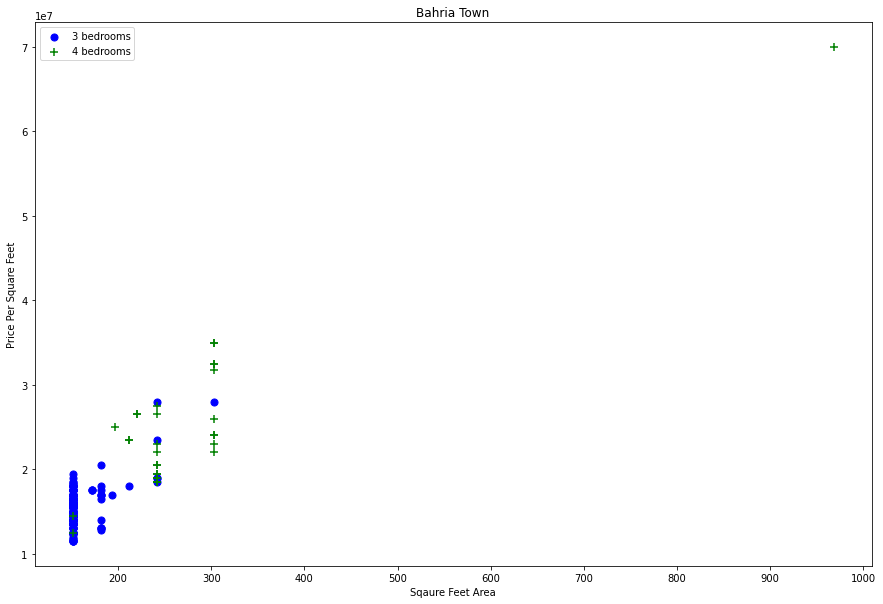

In [31]:
plot_scatter_chart(df5, 'Bahria Town', 'House', '11', 'For Sale', 4)

Each value of bedroom smaller then the mean*0.8 of last bedroom will be deleted. This is done to remove values which had abnormal prices

Seperate if conditions have been made so that later if mean of different areas need to be changed, it can be done accordingly

In [32]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    for purpose, purpose_df in location_df.groupby('purpose'):
      for city, city_df in purpose_df.groupby('city'):
        for month, month_df in city_df.groupby('month'): 
          for type, type_df in month_df.groupby('type'): 
            bedrooms_stats = {}
            for bedrooms, bedrooms_df in type_df.groupby('bedrooms'):
              if city == 'Islamabad':  
                bedrooms_stats[bedrooms] = {
                    'mean': np.mean(bedrooms_df.price_per_sqft)*.80,
                    'std': np.std(bedrooms_df.price_per_sqft),
                    'count': bedrooms_df.shape[0]
                }
              elif city == "Lahore":
                bedrooms_stats[bedrooms] = {
                  'mean': np.mean(bedrooms_df.price_per_sqft)*.80,
                  'std': np.std(bedrooms_df.price_per_sqft),
                  'count': bedrooms_df.shape[0]
              }
              elif city == "Karachi":
                bedrooms_stats[bedrooms] = {
                  'mean': np.mean(bedrooms_df.price_per_sqft)*.80,
                  'std': np.std(bedrooms_df.price_per_sqft),
                  'count': bedrooms_df.shape[0]
              }
            for bedrooms, bedrooms_df in type_df.groupby('bedrooms'):
              stats = bedrooms_stats.get(bedrooms-1)
              if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

In [33]:
df6 = remove_bhk_outliers(df5)
print(df5.shape)
df6.shape

(15702, 13)


(14055, 13)

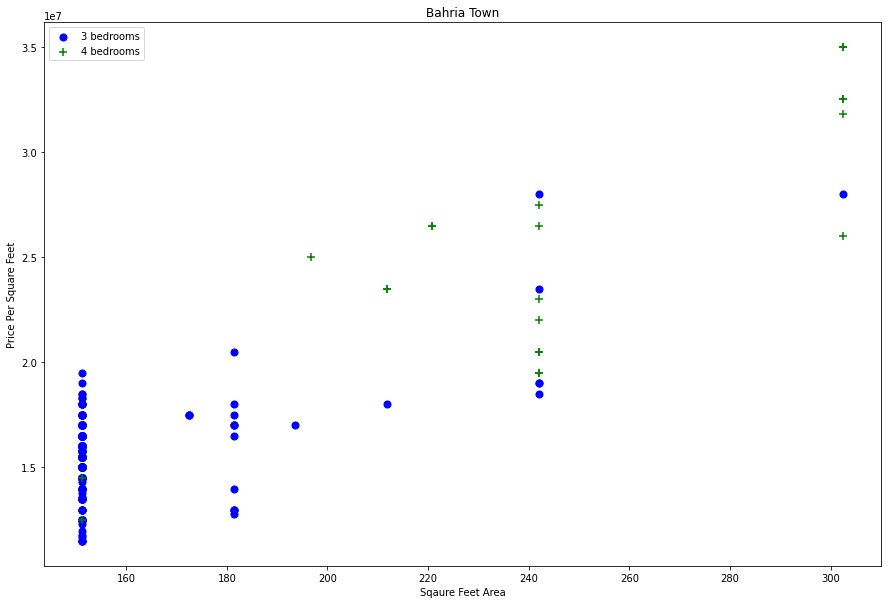

In [34]:
plot_scatter_chart(df6, 'Bahria Town', 'House', '11', 'For Sale', 4)

now the data is more normally regularized with respect to each type

Text(0, 0.5, 'Count')

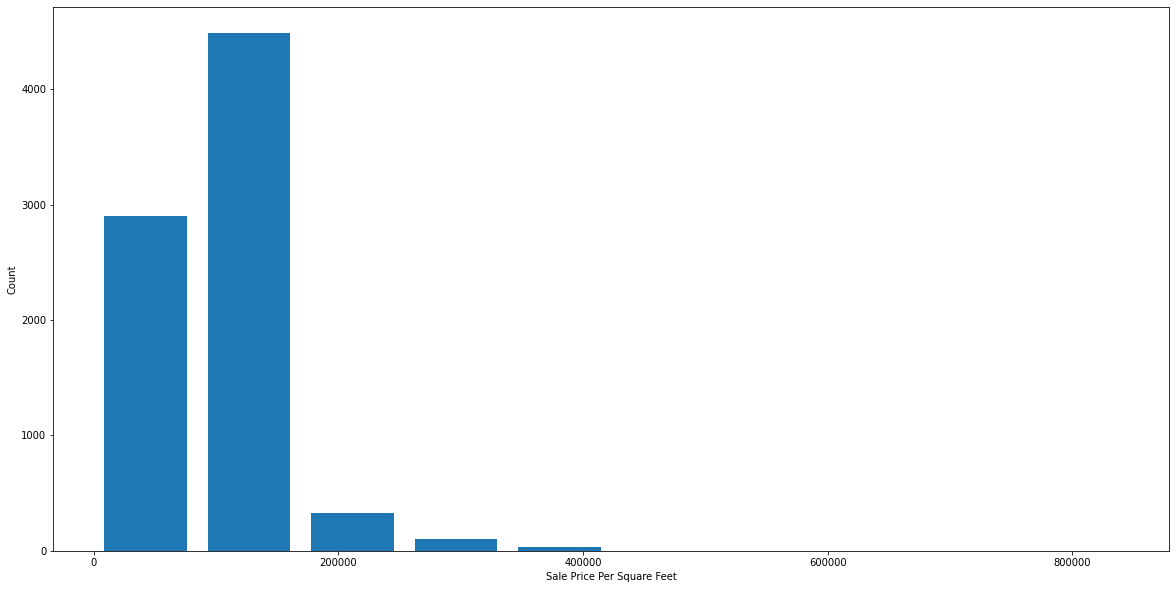

In [35]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6[df6['purpose'] == 'For Sale' ].price_per_sqft, rwidth = 0.8)
plt.xlabel('Sale Price Per Square Feet')
plt.ylabel("Count")

Text(0, 0.5, 'Count')

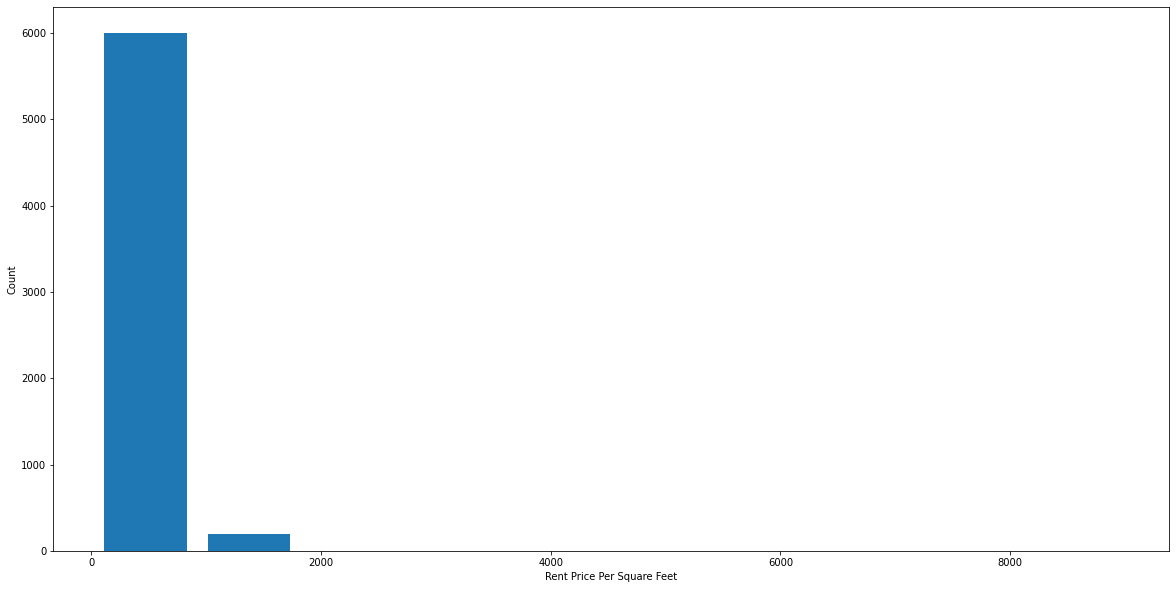

In [36]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6[df6['purpose'] == 'For Rent' ].price_per_sqft, rwidth = 0.8)
plt.xlabel('Rent Price Per Square Feet')
plt.ylabel("Count")

Removing baths and homes hacing 0 value since this is not possible

In [37]:
df6[(df6['baths'] == 0) & (df6['bedrooms'] == 0)]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
54,House,6500000,Al Rehman Garden,Lahore,0,90.7503,For Sale,0,11-18-2021,Rubab Estate And Builders,Ch Dilawar Hussain,11,71625.107575
65,House,7500000,Al Rehman Garden,Lahore,0,90.7503,For Sale,0,11-19-2021,Makkah Properties,Zohaib,11,82644.354895
162,House,1200000,Amil Colony,Karachi,0,1200.0000,For Rent,0,10-23-2021,Fine Real Estate,M. Mubeen,10,1000.000000
190,House,27000000,Architects Engineers Housing Society,Lahore,0,302.5010,For Sale,0,11-18-2021,Pak Real Estates & Builders,Nisar Ahmad,11,89255.903286
435,House,13000000,Bahria Orchard,Lahore,0,151.2505,For Sale,0,11-18-2021,Bin Khalid Real Estate,Muhammad Jahangir Butt,11,85950.129090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,House,55000000,Wapda Town,Lahore,0,605.0000,For Sale,0,11-19-2021,\N,\N,11,90909.090909
15614,House,15500000,Wapda Town,Lahore,0,151.2505,For Sale,0,11-23-2021,Awan Brothers Real Estate & Builders,Nadeem Ashraf Malik Faisal Abbas,11,102479.000069
15627,House,31000000,Wapda Town,Lahore,0,302.5010,For Sale,0,11-23-2021,Jinnah Associates,M Maqbool,11,102479.000069
15628,House,31000000,Wapda Town,Lahore,0,302.5010,For Sale,0,11-23-2021,Jinnah Associates,M Maqbool,11,102479.000069


In [38]:
df7 = df6[~(df6['baths'] == 0)]
df8 = df7[~(df7['bedrooms'] == 0)]
print(df6.shape)
print(df7.shape)
df8.shape

(14055, 13)
(13057, 13)


(13002, 13)

No row with sq ft and price value = 0

In [39]:
print(df8[df8['sq_ft'] == 0])
print(df8[df8['price'] == 0])

Empty DataFrame
Columns: [type, price, location, city, baths, sq_ft, purpose, bedrooms, date_added, agency, agent, month, price_per_sqft]
Index: []
Empty DataFrame
Columns: [type, price, location, city, baths, sq_ft, purpose, bedrooms, date_added, agency, agent, month, price_per_sqft]
Index: []


Checking houses with low sq ft area but high number of rooms



In [40]:
df8[df8['sq_ft'] < 30]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
4950,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-01-2021,\N,\N,11,681.818182
4952,Room,15000,DHA Defence,Karachi,2,11.00000,For Rent,2,11-08-2021,\N,\N,11,1363.636364
4953,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-08-2021,\N,\N,11,681.818182
4954,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-08-2021,\N,\N,11,681.818182
4957,Room,13000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-21-2021,Shackles Enterprises,Hamza,11,590.909091
7680,Flat,18000,E-11,Islamabad,1,27.22509,For Rent,2,11-23-2021,\N,\N,11,661.154839
11748,Room,25000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-23-2021,\N,\N,10,1136.363636
11749,Room,22000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-23-2021,\N,\N,10,1000.000000
11750,Room,25000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-25-2021,\N,\N,10,1136.363636
11751,Room,180000,Jamshed Town,Karachi,1,28.00000,For Rent,1,11-21-2021,\N,\N,11,6428.571429


Entry 15138 and 4952 seem odd since they have low sq ft but high rooms

In [41]:
df9 = df8.drop([15138, 4952 ], axis = 0)
df9[df9['sq_ft'] < 30]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
4950,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-01-2021,\N,\N,11,681.818182
4953,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-08-2021,\N,\N,11,681.818182
4954,Room,15000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-08-2021,\N,\N,11,681.818182
4957,Room,13000,DHA Defence,Karachi,1,22.00000,For Rent,1,11-21-2021,Shackles Enterprises,Hamza,11,590.909091
7680,Flat,18000,E-11,Islamabad,1,27.22509,For Rent,2,11-23-2021,\N,\N,11,661.154839
11748,Room,25000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-23-2021,\N,\N,10,1136.363636
11749,Room,22000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-23-2021,\N,\N,10,1000.000000
11750,Room,25000,Jamshed Town,Karachi,1,22.00000,For Rent,1,10-25-2021,\N,\N,10,1136.363636
11751,Room,180000,Jamshed Town,Karachi,1,28.00000,For Rent,1,11-21-2021,\N,\N,11,6428.571429
12223,Room,5000,Korangi,Karachi,1,13.00000,For Rent,1,11-21-2021,\N,\N,11,384.615385


In [42]:
sale = df9[df9['purpose'] == 'For Sale']
sale[sale['price'] < 2000000]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
7489,Lower Portion,125000,DHA Defence,Lahore,6,605.0000,For Sale,5,11-19-2021,Super Homes,Zahid Ali Shah,11,206.611570
7490,Lower Portion,130000,DHA Defence,Lahore,2,1210.0000,For Sale,2,11-23-2021,White House Real Estate,Saleem/Javed Iqbal,11,107.438017
12077,Flat,1900000,Khayaban-e-Amin,Lahore,1,151.2505,For Sale,2,11-18-2021,HS Estate,Rehan Zubair,11,12561.941944


A house for sale of price less then 20 lakh with 4 and 11 bhk seems erroneous, removing 7535 and 7536

In [43]:
df10 = df9.drop([7489, 7490], axis = 0)
sale2 = df10[df10['purpose'] == 'For Sale']
sale2[sale2['price'] < 2000000]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
12077,Flat,1900000,Khayaban-e-Amin,Lahore,1,151.2505,For Sale,2,11-18-2021,HS Estate,Rehan Zubair,11,12561.941944


In [44]:
rent = df10[df10['purpose'] == 'For Rent']
sale = df10[df10['purpose'] == 'For Sale']
print(sale['price_per_sqft'].sort_values(axis = 0, ascending=False).head(25))
rent['price_per_sqft'].sort_values(axis = 0, ascending=False).head(15)

8123     413223.140496
7998     413223.140496
8012     409090.909091
7763     391474.554154
7766     380165.289256
7761     380165.289256
8063     375657.400451
8005     375657.400451
7765     371900.826446
8004     371900.826446
13316    371428.571429
7759     365376.250544
7985     365013.774105
5656     360000.000000
13315    357142.857143
8061     356007.628735
8065     356007.628735
8118     356007.628735
8116     356007.628735
7969     354191.263282
8057     353117.956424
8113     352828.989193
8179     347107.438017
8086     347107.438017
8174     347107.438017
Name: price_per_sqft, dtype: float64


11754    9036.144578
11753    6885.245902
11751    6428.571429
11752    6153.846154
12072    1600.000000
2966     1515.151515
4940     1500.938086
4941     1500.938086
4938     1406.469761
4939     1406.469761
11684    1400.000000
11680    1400.000000
2917     1250.000000
11679    1250.000000
3092     1250.000000
Name: price_per_sqft, dtype: float64

For rent entry 11754 to 11752 are very odd

In [45]:
df11 = df10.drop([11754, 11753, 11752, 11751], axis = 0)
rent = df11[df11['purpose'] == 'For Rent']
rent['price_per_sqft'].sort_values(axis = 0, ascending=False).head(15)

12072    1600.000000
2966     1515.151515
4941     1500.938086
4940     1500.938086
4939     1406.469761
4938     1406.469761
11680    1400.000000
11684    1400.000000
15219    1250.000000
2917     1250.000000
11679    1250.000000
2945     1250.000000
3092     1250.000000
3008     1225.736500
15688    1214.285714
Name: price_per_sqft, dtype: float64

In [46]:
rent[(rent['price'] > 100000) & (rent['bedrooms'] == 1)]

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
3092,Flat,285000,DHA Defence,Karachi,1,228.0,For Rent,1,08-24-2021,\N,\N,08,1250.000000
3150,Flat,125000,DHA Defence,Karachi,2,142.0,For Rent,1,10-23-2021,Linkers Realty,Sunil Kumar,10,880.281690
3178,Flat,135000,DHA Defence,Karachi,1,135.0,For Rent,1,10-23-2021,Baigs Properties,Khalid Haider,10,1000.000000
3413,Flat,115000,DHA Defence,Karachi,1,128.0,For Rent,1,11-01-2021,Right Track Consultants,Uzair Khan,11,898.437500
3518,Flat,115000,DHA Defence,Karachi,1,128.0,For Rent,1,11-21-2021,Right Track Consultants,Uzair Khan,11,898.437500
3520,Flat,115000,DHA Defence,Karachi,1,128.0,For Rent,1,11-21-2021,Right Track Consultants,Uzair Khan,11,898.437500
3684,Flat,125000,DHA Defence,Karachi,1,142.0,For Rent,1,11-15-2021,Marvi Associates,Abbas Marvi,11,880.281690
3720,Flat,135000,DHA Defence,Karachi,2,135.0,For Rent,1,11-08-2021,True Marketing,Nawab Usman Ali,11,1000.000000
3766,Flat,135000,DHA Defence,Karachi,1,133.0,For Rent,1,11-01-2021,\N,\N,11,1015.037594
3767,Flat,135000,DHA Defence,Karachi,1,133.0,For Rent,1,11-01-2021,\N,\N,11,1015.037594


Altough it's too high a price for renting 1 room house but it may be possible due to the location, hence leaving them as it is

In [47]:
df11.head()

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
0,House,2800000,Aashiana Road,Lahore,2,45.37515,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,61707.784988
1,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776
2,House,4000000,Aashiana Road,Lahore,3,75.62525,For Sale,3,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
3,House,4000000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
4,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776


In [48]:
print(df1.shape)
print(df11.shape)
print(f'{df1.shape[0]- df11.shape[0]} values deleted due to different reasons')

(16910, 26)
(12994, 13)
3916 values deleted due to different reasons


#Data Analysis

Saving this file and exporting to tableau for data analysis

In [49]:
df11.to_csv('zameen_cleaned_data_2021.csv', sep=',', index=False)
df11.to_excel('zameen_cleaned_data_2021.xlsx', index=False)

# Data Modeling

In [50]:
df11.head()

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
0,House,2800000,Aashiana Road,Lahore,2,45.37515,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,61707.784988
1,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776
2,House,4000000,Aashiana Road,Lahore,3,75.62525,For Sale,3,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
3,House,4000000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
4,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776


removing date_added, agency, agent and price_per_sqft since they are not needed in creating a model


In [51]:
df12 = df11.drop(['date_added','price_per_sqft', 'agency', 'agent', 'month'], axis = 'columns')
df12.head()

,type,price,location,city,baths,sq_ft,purpose,bedrooms
0,House,2800000,Aashiana Road,Lahore,2,45.37515,For Sale,2
1,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2
2,House,4000000,Aashiana Road,Lahore,3,75.62525,For Sale,3
3,House,4000000,Aashiana Road,Lahore,2,75.62525,For Sale,2
4,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2


###One Hot Encoding

1st) Type

In [52]:
dummies1 = pd.get_dummies(df12.type)
dummies1.head()

,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [53]:
df13 = pd.concat([df12.drop('type', axis = 'columns'), dummies1], axis = 'columns')
df13.head()

,price,location,city,baths,sq_ft,purpose,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion
0,2800000,Aashiana Road,Lahore,2,45.37515,For Sale,2,0,0,1,0,0,0,0
1,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0
2,4000000,Aashiana Road,Lahore,3,75.62525,For Sale,3,0,0,1,0,0,0,0
3,4000000,Aashiana Road,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0
4,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0


2) For Location

In [54]:
dummies2 = pd.get_dummies(df13.location)
dummies2.head()

,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,Burma Town,CBR Town,Canal Bank Housing Scheme,Canal Garden,Canal View,Cantt,Cavalry Extension,Cavalry Ground,Central Park Housing Scheme,Chak Shahzad,Chinar Bagh,...,Sabzazar Scheme,Saddar Town,Safari Garden Housing Scheme,Samanabad,Scheme 33,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df14 = pd.concat([df13.drop('location', axis = 'columns'), dummies2], axis = 'columns')
df14.head()

,price,city,baths,sq_ft,purpose,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,...,Sabzazar Scheme,Saddar Town,Safari Garden Housing Scheme,Samanabad,Scheme 33,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park
0,2800000,Lahore,2,45.37515,For Sale,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3800000,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4000000,Lahore,3,75.62525,For Sale,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4000000,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3800000,Lahore,2,75.62525,For Sale,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


3)For purpose

In [56]:
dummies3 = pd.get_dummies(df14.purpose)
dummies3.head()

,For Rent,For Sale
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [57]:
df15 = pd.concat([df14.drop('purpose', axis = 'columns'), dummies3], axis = 'columns')
df15.head()

,price,city,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,...,Safari Garden Housing Scheme,Samanabad,Scheme 33,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale
0,2800000,Lahore,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3800000,Lahore,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4000000,Lahore,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4000000,Lahore,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3800000,Lahore,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


4) For city

In [58]:
dummies4 = pd.get_dummies(df15.city)
dummies4.head()

,Islamabad,Karachi,Lahore
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [59]:
df16 = pd.concat([df15.drop('city', axis = 'columns'), dummies4], axis = 'columns')
df16.head()

,price,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,...,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale,Islamabad,Karachi,Lahore
0,2800000,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,3800000,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,4000000,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,4000000,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,3800000,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Changing price in lakhs

In [60]:
df16['price'] = df16['price']/100000
df16.head()

,price,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,...,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale,Islamabad,Karachi,Lahore
0,28.0,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,40.0,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,40.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,38.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [61]:
df17 = df16.rename(columns={'price': 'price_per_lakh'})
df17

,price_per_lakh,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,...,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale,Islamabad,Karachi,Lahore
0,28.0,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,40.0,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,40.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,38.0,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,70.0,3,60.50020,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15698,110.0,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15699,110.0,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15700,110.0,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


### Model Building

In [62]:
x = df17.drop('price_per_lakh', axis= 'columns')
x

,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,Burma Town,...,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale,Islamabad,Karachi,Lahore
0,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,3,60.50020,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15698,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15699,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15700,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [63]:
y = df17.price_per_lakh
y

0         28.0
1         38.0
2         40.0
3         40.0
4         38.0
         ...  
15697     70.0
15698    110.0
15699    110.0
15700    110.0
15701     70.0
Name: price_per_lakh, Length: 12994, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_train,y_train)

0.6987805808518541

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), x, y, cv= cv)

array([-7.29342703e+09, -2.41818701e+11, -4.54049600e+05, -2.41230153e+10,
       -6.89137623e+12])

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores)

In [68]:
find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best_score,best_params
0,linear_regression,-1.432922e+12,{'normalize': False}
1,lasso,6.765392e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,9.192506e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [69]:
lr_clf = DecisionTreeRegressor(criterion= 'mse', splitter = 'best')
lr_clf.fit(x_train,y_train)
lr_clf.score(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.9938096163413386

In [70]:
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
cross_val_score(DecisionTreeRegressor(criterion= 'mse', splitter = 'best'), x, y, cv= cv)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

array([0.89151941, 0.92930156, 0.90347552, 0.94751571, 0.88146618])

In [71]:
x

,baths,sq_ft,bedrooms,Farm House,Flat,House,Lower Portion,Penthouse,Room,Upper Portion,Aashiana Road,Abul Hassan Isphani Road,Airport,Al Rehman Garden,Al-Hafiz Town,Al-Hamad Colony (AIT),Al-Hilal Society,Alfalah Town,Allama Iqbal Town,Amil Colony,Amir Khusro,Architects Engineers Housing Society,Askari,Audit & Accounts Housing Society,B-17,Bahria Nasheman,Bahria Orchard,Bahria Town,Bahria Town Karachi,Band Road,Bani Gala,Bankers Avenue Cooperative Housing Society,Bankers Co-operative Housing Society,Bankers Town,Bath Island,Beacon House Society,Bedian Road,Bhara kahu,Bismillah Housing Scheme,Burma Town,...,Sea View Apartments,Shadab Garden,Shadman,Shah Allah Ditta,Shah Faisal Town,Shah Jamal,Shaheed Millat Road,Shahra-e-Faisal,Shershah Colony - Raiwind Road,Sindh Industrial Trading Estate (SITE),Soan Garden,Stadium Road,State Life Housing Society,Sui Gas Housing Society,TIP Housing Society,Taj Bagh Scheme,Tajpura,Tariq Gardens,Tariq Road,Tarlai,Thethar,Thokar Niaz Baig,Tipu Sultan Road,Top City 1,Township,UET Housing Society,University Road,Upper Mall,Valencia Housing Society,Wahdat Colony,Walton Road,Wapda Town,West Wood Housing Society,Zamzama,Zubaida Park,For Rent,For Sale,Islamabad,Karachi,Lahore
0,2,45.37515,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3,75.62525,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2,75.62525,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15697,3,60.50020,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15698,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15699,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
15700,3,90.75030,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [72]:
def predict_price(location,sq_ft,baths,bedrooms,type, purpose, city):
  type_index = np.where(x.columns == type)[0][0]
  purpose_index = np.where(x.columns == purpose)[0][0]
  city_index = np.where(x.columns == city)[0][0]
  loc_index = np.where(x.columns == location)[0][0]

  X = np.zeros(len(x.columns))
  X[0] = baths
  X[1] = sq_ft
  X[2] = bedrooms
  if loc_index >= 0:
    X[loc_index] = 1
  if type_index >= 0:
    X[type_index] = 1
  if purpose_index >= 0:
    X[purpose_index] = 1
  if city_index >= 0:
    X[city_index] = 1
  return lr_clf.predict([X])[0]*100000

In [73]:
predict_price('Abul Hassan Isphani Road', 100, 3 ,3, 'Flat', 'For Rent', 'Karachi')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


25000.0

In [74]:
df11.head(15)

,type,price,location,city,baths,sq_ft,purpose,bedrooms,date_added,agency,agent,month,price_per_sqft
0,House,2800000,Aashiana Road,Lahore,2,45.37515,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,61707.784988
1,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776
2,House,4000000,Aashiana Road,Lahore,3,75.62525,For Sale,3,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
3,House,4000000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,52892.387133
4,House,3800000,Aashiana Road,Lahore,2,75.62525,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,50247.767776
5,House,2500000,Aashiana Road,Lahore,1,45.37515,For Sale,1,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,55096.236596
6,House,3600000,Aashiana Road,Lahore,2,60.50020,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,59503.935524
7,House,5200000,Aashiana Road,Lahore,2,90.75030,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,57300.086060
8,House,3500000,Aashiana Road,Lahore,2,60.50020,For Sale,2,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,57851.048426
9,House,5200000,Aashiana Road,Lahore,3,90.75030,For Sale,3,11-19-2021,Ittehad Estates,Muhammad Iqbal,11,57300.086060


In [75]:
import pickle 
with open('zameen_home_prices_model.pickle', 'wb') as f:
  pickle.dump(lr_clf,f)

In [76]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", 'w') as f:
  f.write(json.dumps(columns))